In [1]:
import scipy
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import io

In [2]:
### Opens an IDL file in python using scipy ###
data = scipy.io.readsav('diffuse_survey_source_arrays/1131709192_source_array.sav',python_dict=True)

In [ ]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data_all = []
point_data_children = []
point_data_not_children = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data_all.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

In [ ]:
### Creating a 2D histogram of a single extended obj. ###

elem = 12
x = data['source_array']['extend'][elem]['RA']
y = data['source_array']['extend'][elem]['DEC']
plt.hist2d(x, y, bins=40)
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('DEC')
plt.title('2-D Histogram of a Single Extended Source (Element 12)')
plt.show()
#plt.savefig('file_name')

In [10]:
### Create a function to open and plot one file ###

def filesav(filename, vmax):
    
    ### OPENING THE .SAV FILE IN PYTHON ###
    
    data = scipy.io.readsav(filename,python_dict=True) 
    
    data_len = range(len(data['source_array']))
    point_data = []
    extended_data = []

    for i in data_len:
        if data['source_array'][i][-2] is None:
            point_data.append(data['source_array'][i])
        else:
            extended_data.append(data['source_array'][i])
    
    print 'There are', len(data['source_array']), 'sources in this file.'
    print 'There are', len(extended_data), 'extended sources in this file.'
    print 'There are', len(point_data), 'point sources in this file.'
    
    #---------------------------------------------------------------------#
    
    ### DECLARING VARIABLES FOR PLOTS ###
    
    extended_RA = []
    extended_DEC = []
    extended_FREQ = []
    extended_I = []
    
    #these will make the ra range [-180,180] rather than [0,360]
    
    for i in range(len(extended_data)):
        if extended_data[i]['RA'] > 180:
            extended_data[i]['RA'] -= 360
            
    for i in range(len(point_data)):
        if point_data[i]['RA'] > 180:
            point_data[i]['RA'] -= 360

    #        
            
    for i in range(len(extended_data)):
        extended_RA.append(extended_data[i]['RA'])
        extended_DEC.append(extended_data[i]['DEC'])
        extended_FREQ.append(extended_data[i]['FREQ'])
        extended_I.append(extended_data[i]['FLUX']['I'][0])

    point_RA = []
    point_DEC = []
    point_FREQ = []
    point_I = []

    for i in range(len(point_data)):
        point_RA.append(point_data[i]['RA'])
        #for o in range(len(point_RA))
        #   if point_RA[o] > 180
        #      point_RA[o] -= 360
        point_DEC.append(point_data[i]['DEC'])
        point_FREQ.append(point_data[i]['FREQ'])
        point_I.append(point_data[i]['FLUX']['I'][0])

    intensity_all = []
    for i in range(len(data['source_array'])):
        intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
        arrays = []
        
    for i in data_len: 
        arrays.append(data['source_array'][i]['flux'][0][0])

    # vmax = np.mean(arrays)
    
    #------------------------------------------------------------------#
    
    ### PLOTTING THE DATA ###
    
    plt.figure(figsize=(20, 10))
    plt.suptitle('ObsID 1131709192')
    '''
    plt.subplot(3,3,1)
    plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
    plt.title('Frequency (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()
    '''
    plt.subplot(1,2,1)
    plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=intensity_all,vmax=vmax,s=10)
    plt.title('Intensity (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(1,2,2)
    plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
    plt.title('Histogram - Position (All Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()
    '''
    plt.subplot(3,3,4)
    plt.scatter(point_RA,point_DEC,c=point_FREQ)
    plt.title('Frequency (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,5)
    plt.scatter(point_RA,point_DEC,c=point_I,vmax=vmax,s=10)
    plt.title('Intensity (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,6)
    plt.hist2d(point_RA,point_DEC,bins=100)
    plt.title('Position (All Point Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,7)
    plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
    plt.title('Frequency (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,8)
    plt.scatter(extended_RA,extended_DEC,c=extended_I,vmax=vmax,s=10)
    plt.title('Intensity (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()

    plt.subplot(3,3,9)
    plt.hist2d(extended_RA,extended_DEC,bins=100)
    plt.title('Position (Only Extended Sources)')
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.colorbar()
    '''
    #plt.show()
    plt.savefig('1131709192map.png')
    

In [ ]:
# ==================================================================
# --------------Separating Point and Extended Sources---------------
# ==================================================================

#Finding length of data in *_source_array.sav to use as range in for loop
data_len = range(len(data['source_array']))

#Initializing lists for point and extended objects.
point_data = []
extended_data = []

#Separating data in *_source_array.sav between point and extended objects.
for i in data_len:
    if data['source_array'][i][-2] is None:
        point_data.append(data['source_array'][i])
    else:
        extended_data.append(data['source_array'][i])

extended_RA = []
extended_DEC = []
extended_FREQ = []
extended_I = []

for i in range(len(extended_data)):
    extended_RA.append(extended_data[i]['RA'])
    extended_DEC.append(extended_data[i]['DEC'])
    extended_FREQ.append(extended_data[i]['FREQ'])
    extended_I.append(extended_data[i]['FLUX']['I'][0])

point_RA = []
point_DEC = []
point_FREQ = []
point_I = []

for i in range(len(point_data)):
    point_RA.append(point_data[i]['RA'])
    point_DEC.append(point_data[i]['DEC'])
    point_FREQ.append(point_data[i]['FREQ'])
    point_I.append(point_data[i]['FLUX']['I'][0])
    
intensity_all = []
for i in range(len(data['source_array'])):
    intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
    
#-----------------------------------------------------------#
plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=np.fft.ifft(intensity_all),vmax=.025)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_RA,point_DEC,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_RA,point_DEC,c=np.fft.ifft(point_I),vmax=.025)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_RA,extended_DEC,c=np.fft.ifft(extended_I),vmax=.025,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()
#plt.show()
#plt.savefig('firstplot.png')

In [ ]:
arrays = []
for i in data_len: 
    arrays.append(data['source_array'][i]['flux'][0][0])

vmax = np.mean(arrays)

plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
plt.title('Frequency (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,2)
plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=np.fft.ifft(intensity_all),vmax=vmax)
plt.title('Inverse FT Intensity (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,3)
plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=100)
plt.title('Position (All Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,4)
plt.scatter(point_RA,point_DEC,c=point_FREQ)
plt.title('Frequency (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,5)
plt.scatter(point_RA,point_DEC,c=np.fft.ifft(point_I),vmax=vmax)
plt.title('Inverse FT Intensity (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,6)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (All Point Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,7)
plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
plt.title('Frequency (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,8)
plt.scatter(extended_RA,extended_DEC,c=np.fft.ifft(extended_I),vmax=vmax,s=10)
plt.title('Inverse FT Intensity (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()

plt.subplot(3,3,9)
plt.hist2d(point_RA,point_DEC,bins=100)
plt.title('Position (Only Extended Sources)')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.colorbar()
plt.show()

In [135]:
### Create a function to open lots of files at once ###

def foldersav():
    
    all_files = glob.glob('diffuse_survey_source_arrays/*.sav')
    
    for o in range(len(all_files)):
        
        filename = all_files[o]
        
        print filename
    
        ### OPENING THE .SAV FILE IN PYTHON ###

        data = scipy.io.readsav(filename,python_dict=True) 

        data_len = range(len(data['source_array']))
        point_data = []
        extended_data = []

        for i in data_len:
            if data['source_array'][i][-2] is None:
                point_data.append(data['source_array'][i])
            else:
                extended_data.append(data['source_array'][i])

        print 'There are', len(data['source_array']), 'sources in this file.'
        print 'There are', len(extended_data), 'extended sources in this file.'
        print 'There are', len(point_data), 'point sources in this file.'

        #---------------------------------------------------------------------#

        ### DECLARING VARIABLES FOR PLOTS ###

        extended_RA = []
        extended_DEC = []
        extended_FREQ = []
        extended_I = []

        for i in range(len(extended_data)):
            extended_RA.append(extended_data[i]['RA'])
            extended_DEC.append(extended_data[i]['DEC'])
            extended_FREQ.append(extended_data[i]['FREQ'])
            extended_I.append(extended_data[i]['FLUX']['I'][0])

        point_RA = []
        point_DEC = []
        point_FREQ = []
        point_I = []

        for i in range(len(point_data)):
            point_RA.append(point_data[i]['RA'])
            point_DEC.append(point_data[i]['DEC'])
            point_FREQ.append(point_data[i]['FREQ'])
            point_I.append(point_data[i]['FLUX']['I'][0])

        intensity_all = []
        for i in range(len(data['source_array'])):
            intensity_all.append(data['source_array']['FLUX'][i]['I'][0])
            arrays = []

        for i in data_len: 
            arrays.append(data['source_array'][i]['flux'][0][0])

        vmax = np.mean(arrays)

        #------------------------------------------------------------------#

        ### PLOTTING THE DATA ###

        return plt.figure(figsize=(18, 15))

        plt.subplot(3,3,1)
        plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=data['source_array']['FREQ'])
        plt.title('Frequency (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,2)
        plt.scatter(data['source_array']['RA'],data['source_array']['DEC'],c=intensity_all,vmax=vmax,s=10)
        plt.title('Intensity (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,3)
        plt.hist2d(data['source_array']['RA'],data['source_array']['DEC'],bins=60)
        plt.title('Position (All Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,4)
        plt.scatter(point_RA,point_DEC,c=point_FREQ)
        plt.title('Frequency (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,5)
        plt.scatter(point_RA,point_DEC,c=point_I,vmax=vmax,s=10)
        plt.title('Intensity (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,6)
        plt.hist2d(point_RA,point_DEC,bins=60)
        plt.title('Position (All Point Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,7)
        plt.scatter(extended_RA,extended_DEC,c=extended_FREQ)
        plt.title('Frequency (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,8)
        plt.scatter(extended_RA,extended_DEC,c=extended_I,vmax=vmax,s=10)
        plt.title('Intensity (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()

        plt.subplot(3,3,9)
        plt.hist2d(extended_RA,extended_DEC,bins=60)
        plt.title('Position (Only Extended Sources)')
        plt.xlabel('RA')
        plt.ylabel('DEC')
        plt.colorbar()
        plt.show()
        

In [11]:
'''
all_files = glob.glob('foldername/*.sav')
for o in range(len(all_files)):
        
     filename = all_files[o]
    
     ### OPENING THE .SAV FILE IN PYTHON ###

     data = scipy.io.readsav(filename,python_dict=True) 
     '''
print filesav('diffuse_survey_source_arrays/1131709192_source_array.sav', 10)

There are 6554 sources in this file.
There are 2271 extended sources in this file.
There are 4283 point sources in this file.
None


There are 5905 sources in this file.
There are 2311 extended sources in this file.
There are 3594 point sources in this file.


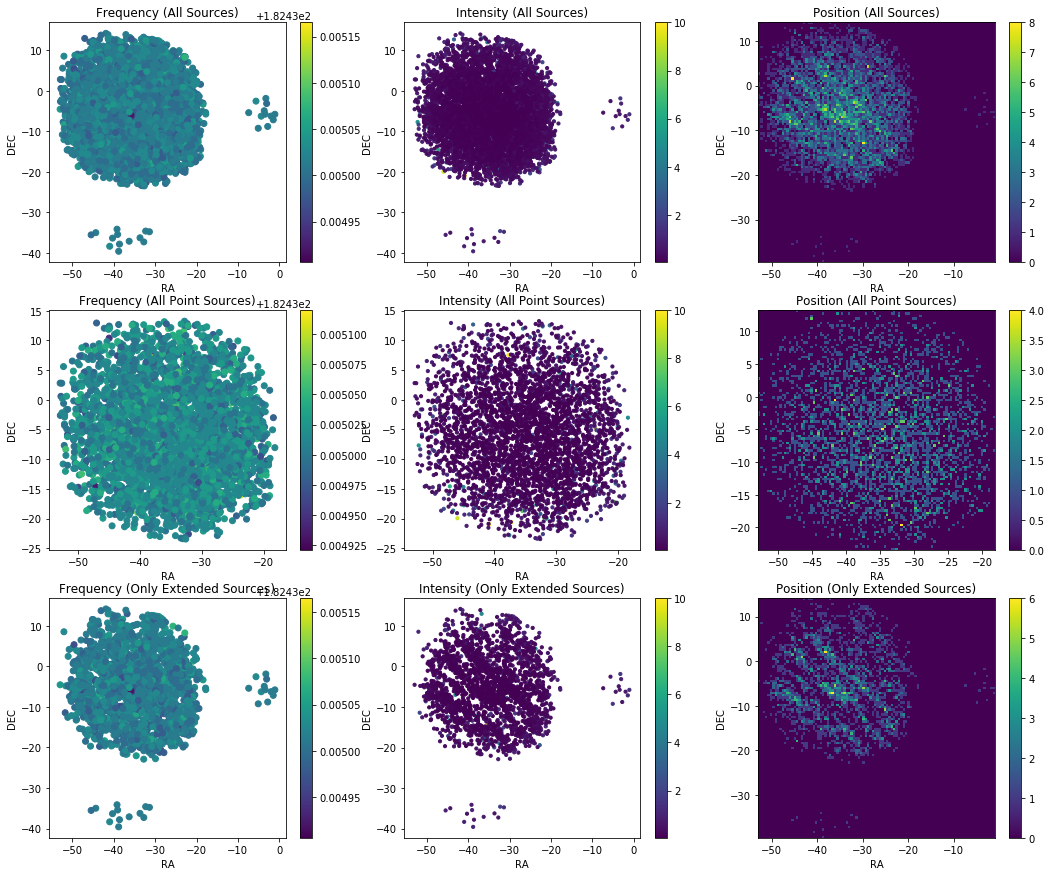

In [22]:
filesav('diffuse_survey_source_arrays/1131534824_source_array.sav', 10)

In [20]:
foldersav()

In [56]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import io
import glob

def collectorw(path):
    '''Collects all IDL save data from a given path and stores each file as an element in a list.'''
    
    filenames = glob.glob(path)
    
    data = {'data':[scipy.io.readsav(filenames[i],python_dict=True)             for i in range(len(filenames))],'filenames':filenames}
    return data

def separatorw(data):
    '''Compiles data into separate lists of extended and point sources'''

    point_data = [[data['data'][i]['source_array'][j]         for j in range(len(data['data'][i]['source_array']))         if data['data'][i]['source_array'][j][-2] is None ]     for i in range(len(data['data']))]
    
    extended_data = [[data['data'][i]['source_array'][j]         for j in range(len(data['data'][i]['source_array']))         if data['data'][i]['source_array'][j][-2] is not None ]     for i in range(len(data['data'])) ]

    return {'extsources':extended_data,'psources':point_data}

def plotallw(data):

    separated = separatorw(data)
    
    all_point_sources_RA = [separated['psources'][i][j]['RA']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_point_sources_DEC = [separated['psources'][i][j]['DEC']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_point_sources_I = [separated['psources'][i][j]['FLUX']['I']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_EO_sources_RA = [separated['extsources'][i][j]['EXTEND']['RA'][k]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))]

    all_EO_sources_DEC = [separated['extsources'][i][j]['EXTEND']['DEC'][k]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))]

    all_EO_sources_I = [separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
    
    all_RA = all_point_sources_RA + all_EO_sources_RA
    for i in range(len(all_RA)):
        if all_RA[i] > 180:
            all_RA[i] = -(360 - all_RA[i])
    all_DEC = all_point_sources_DEC + all_EO_sources_DEC
    all_I = all_point_sources_I + all_EO_sources_I
    
    import matplotlib.colors as colors
    from matplotlib.mlab import bivariate_normal
    
    cm = plt.cm.get_cmap('PuBu_r')
    plt.figure(figsize=(11,8))
    plt.scatter(all_RA,all_DEC,c=all_I,s=2,vmax=10,cmap='magma',norm=colors.LogNorm())
    plt.colorbar()
    #plt.xlim(50,52)
    #plt.ylim(-36,-38)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.show()

def plotextw(data,minI):
    
    separated = separatorw(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if max(indexed_EO_sources_I[i][j]) > minI:
                plt.figure()
                from astropy.convolution import convolve
                from astropy.convolution import Gaussian1DKernel
                g = Gaussian1DKernel(stddev=50)
                z = convolve(indexed_EO_sources_I[i][j], g, boundary='extend')
                plt.scatter(indexed_EO_sources_RA[i][j],indexed_EO_sources_DEC[i][j],s=50,c=z)
                plt.colorbar(label='Janskies')
                #plt.figtext(0, -.15, "ObsID: {}\nTotal lux: {}\nMean RA: {}\nMean Dec: {}".format \
                #    (data[1][i],np.sum(indexed_EO_sources_I[i]),np.sum(indexed_EO_sources_RA[i]),np.sum(indexed_EO_sources_DEC[i])))
                plt.xlabel('RA')
                plt.ylabel('DEC')
    plt.show()

In [111]:
data = collectorw('diffuse_survey_source_arrays/1130789944_source_array.sav')

In [86]:
plotextw(data)

TypeError: plotextw() takes exactly 2 arguments (1 given)

In [57]:
def plotalle(data):

    separated = separator(data)
    
    all_point_sources_RA = [separated['psources'][i][j]['RA']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_point_sources_DEC = [separated['psources'][i][j]['DEC']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_point_sources_I = [separated['psources'][i][j]['FLUX']['I']         for i in range(len(separated['psources']))         for j in range(len(separated['psources'][i]))]

    all_EO_sources_RA = [separated['extsources'][i][j]['EXTEND']['RA'][k]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))]

    all_EO_sources_DEC = [separated['extsources'][i][j]['EXTEND']['DEC'][k]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))]

    all_EO_sources_I = [separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0]         for i in range(len(separated['extsources']))         for j in range(len(separated['extsources'][i]))         for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
    
    all_RA = all_point_sources_RA + all_EO_sources_RA
    for i in range(len(all_RA)):
        if all_RA[i] > 180:
            all_RA[i] = -(360 - all_RA[i])
    all_DEC = all_point_sources_DEC + all_EO_sources_DEC
    all_I = all_point_sources_I + all_EO_sources_I
    
    import matplotlib.colors as colors
    from matplotlib.mlab import bivariate_normal

    cm = plt.cm.get_cmap('PuBu_r')
    plt.figure(figsize=(11,8))
    plt.scatter(all_RA,all_DEC,c=all_I,s=2,vmax=10,cmap='magma',norm=colors.LogNorm())
    plt.colorbar()
    #plt.xlim(50,52)
    #plt.ylim(-36,-38)
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.show()

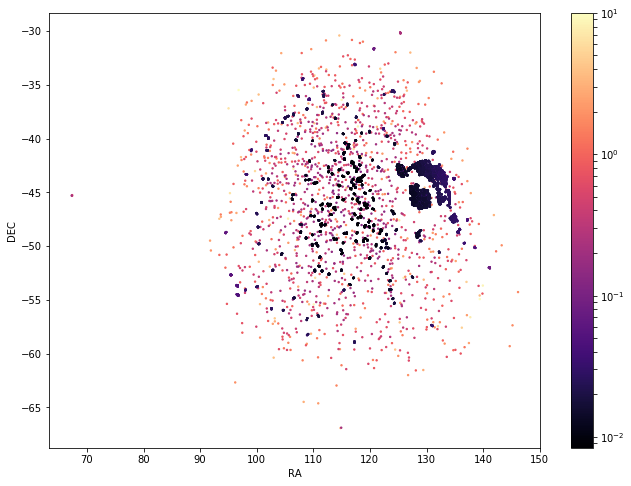

In [87]:
plotalle(data)

In [113]:
def plotEO(data,minI):
    
    separated = separator(data)
    
    indexed_EO_sources_RA = [[[separated['extsources'][i][j]['EXTEND']['RA'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['RA']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_DEC = [[[separated['extsources'][i][j]['EXTEND']['DEC'][k] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['DEC']))] \
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]

    indexed_EO_sources_I = [[[separated['extsources'][i][j]['EXTEND']['FLUX'][k]['I'][0] \
        for k in range(len(separated['extsources'][i][j]['EXTEND']['FLUX'])) ]
            for j in range(len(separated['extsources'][i]))] \
                for i in range(len(separated['extsources'])) ]
    
    for i in range(len(separated['extsources'])):
        for j in range(len(separated['extsources'][i])):
            if max(indexed_EO_sources_I[i][j]) > minI:
                plt.figure()
                plt.scatter(indexed_EO_sources_RA[i][j],indexed_EO_sources_DEC[i][j],s=50,c=indexed_EO_sources_I[i][j])
                plt.colorbar(label='Janskies')
                #plt.figtext(0, -.15, "ObsID: {}\nTotal Flux: {}\nMean RA: {}\nMean Dec: {}".format \
                 #   (data['filenames'][i][29:-17], np.sum(indexed_EO_sources_I[i]), np.mean(indexed_EO_sources_RA[i][j]), np.mean(indexed_EO_sources_DEC[i][j])))
                plt.xlabel('RA')
                plt.ylabel('DEC')
    return plt.show()

In [125]:
import filedata
from filedata import *
data1 = openFile('diffuse_survey_source_arrays/1130789944_source_array.sav')
np.sort(extObj(data1))

Elements in this file which are extended objects:

element 0 has intensity 38.8506
element 1 has intensity 130.666
element 2 has intensity 18.0187
element 5 has intensity 12.4276
element 6 has intensity 12.7577
element 8 has intensity 11.6553
element 10 has intensity 11.4336
element 11 has intensity 38.026
element 15 has intensity 8.69575
element 20 has intensity 44.029
element 21 has intensity 34.8654
element 25 has intensity 25.5857
element 26 has intensity 62.5106
element 27 has intensity 7.00912
element 30 has intensity 6.30147
element 32 has intensity 7.03187
element 34 has intensity 33.1474
element 38 has intensity 8.15847
element 40 has intensity 8.72179
element 42 has intensity 7.37775
element 45 has intensity 18.5579
element 46 has intensity 19.8682
element 47 has intensity 13.501
element 52 has intensity 4.90118
element 59 has intensity 4.87012
element 60 has intensity 4.05637
element 64 has intensity 3.91956
element 74 has intensity 57.1646
element 82 has intensity 3.51772
e

ValueError: Setting void-array with object members using buffer.